##Importando os dados

In [ ]:
import pandas as pd

In [ ]:
df_principal = pd.read_excel("/content/Imersão Python - Tabela de ações.xlsx", sheet_name = "Principal")
df_principal.head()

,Ativo,Data,Último (R$),Var. Dia (%),Var. Sem. (%),Var. Mês (%),Var. Ano (%),Var. 12M (%),Val. Mín,Val. Máx,Volume
0,USIM5,2024-01-26,9.50,5.20,11.76,2.26,2.26,15.97,9.18,9.56,"319,16 M"
1,CMIN3,2024-01-26,6.82,2.40,2.40,-12.11,-12.11,50.56,6.66,6.86,"32,65 M"
2,PETR3,2024-01-26,41.96,2.19,7.73,7.64,7.64,77.55,40.81,42.34,"436,69 M"
3,SUZB3,2024-01-26,52.91,2.04,2.14,-4.89,-4.89,18.85,51.89,53.17,"162,55 M"
4,CPFE3,2024-01-26,37.10,2.03,2.49,-3.66,-3.66,20.70,36.37,37.32,"73,42 M"


In [ ]:
df_total_acoes = pd.read_excel("/content/Imersão Python - Tabela de ações.xlsx", sheet_name = "Total_de_acoes")
df_total_acoes.head()

,Código,Qtde. Teórica
0,RRRP3,235665566.00
1,ALOS3,532616595.00
2,ALPA4,176733968.00
3,ABEV3,4394245879.00
4,ARZZ3,62305891.00


In [ ]:
df_ticker = pd.read_excel("/content/Imersão Python - Tabela de ações.xlsx", sheet_name = "Ticker")
df_ticker.head()

,Ticker,Nome
0,MGLU3,Magazine Luiza
1,HAPV3,Hapvida
2,PETR4,Petrobras
3,B3SA3,B3
4,USIM5,Usiminas


In [ ]:
df_chatgpt = pd.read_excel("/content/Imersão Python - Tabela de ações.xlsx", sheet_name = "ChatGPT")
df_chatgpt.head()

,Nome da empresa,Segmento,Idade (anos)
0,Usiminas,Siderurgia,60
1,CSN Mineração,Mineração,8
2,Petrobras,Petróleo,69
3,Suzano,Papel e Celulose,94
4,CPFL Energia,Energia,109


##Tratando os dados do dataframe principal

In [ ]:
# Alterando df_principal para conter apenas os valores do dia a ser analisado
df_principal = df_principal[['Ativo',	'Data',	'Último (R$)',	'Var. Dia (%)']].copy()
df_principal.head()

,Ativo,Data,Último (R$),Var. Dia (%)
0,USIM5,2024-01-26,9.50,5.20
1,CMIN3,2024-01-26,6.82,2.40
2,PETR3,2024-01-26,41.96,2.19
3,SUZB3,2024-01-26,52.91,2.04
4,CPFE3,2024-01-26,37.10,2.03


In [ ]:
# Renomeando as colunas para evitar utilizar caracteres especiais que possam não ser interpretados (lidos pelos códigos)
df_principal = df_principal.rename(columns={'Último (R$)':'valor_final', 'Var. Dia (%)':'var_dia_pct'}).copy()
df_principal.head()

,Ativo,Data,valor_final,var_dia_pct
0,USIM5,2024-01-26,9.50,5.20
1,CMIN3,2024-01-26,6.82,2.40
2,PETR3,2024-01-26,41.96,2.19
3,SUZB3,2024-01-26,52.91,2.04
4,CPFE3,2024-01-26,37.10,2.03


In [ ]:
# Inserindo as colunas de variação percentual na forma decimal e do valor inicial de cada ação em df_principal
df_principal['var_pct'] = df_principal['var_dia_pct'] / 100
df_principal['valor_inicial'] = df_principal['valor_final'] / (df_principal['var_pct'] + 1)
df_principal.head()

,Ativo,Data,valor_final,var_dia_pct,var_pct,valor_inicial
0,USIM5,2024-01-26,9.50,5.20,0.05,9.03
1,CMIN3,2024-01-26,6.82,2.40,0.02,6.66
2,PETR3,2024-01-26,41.96,2.19,0.02,41.06
3,SUZB3,2024-01-26,52.91,2.04,0.02,51.85
4,CPFE3,2024-01-26,37.10,2.03,0.02,36.36


In [ ]:
# Agrupando df_total_acoes em df_principal para inserir a quantidade teórica de ações por empresa
df_principal = df_principal.merge(df_total_acoes, left_on='Ativo', right_on='Código', how='left')
df_principal.head()

,Ativo,Data,valor_final,var_dia_pct,var_pct,valor_inicial,Código,Qtde. Teórica
0,USIM5,2024-01-26,9.50,5.20,0.05,9.03,USIM5,515117391.00
1,CMIN3,2024-01-26,6.82,2.40,0.02,6.66,CMIN3,1110559345.00
2,PETR3,2024-01-26,41.96,2.19,0.02,41.06,PETR3,2379877655.00
3,SUZB3,2024-01-26,52.91,2.04,0.02,51.85,SUZB3,683452836.00
4,CPFE3,2024-01-26,37.10,2.03,0.02,36.36,CPFE3,187732538.00


In [ ]:
# Excluindo a coluna 'Código' para evitar informações duplicadas em df_principal e renomeando a coluna de quantidade de ações
df_principal = df_principal.drop(columns=['Código'])
df_principal = df_principal.rename(columns={'Qtde. Teórica':'qtdd_teorica'}).copy()
df_principal.head()

,Ativo,Data,valor_final,var_dia_pct,var_pct,valor_inicial,qtdd_teorica
0,USIM5,2024-01-26,9.50,5.20,0.05,9.03,515117391.00
1,CMIN3,2024-01-26,6.82,2.40,0.02,6.66,1110559345.00
2,PETR3,2024-01-26,41.96,2.19,0.02,41.06,2379877655.00
3,SUZB3,2024-01-26,52.91,2.04,0.02,51.85,683452836.00
4,CPFE3,2024-01-26,37.10,2.03,0.02,36.36,187732538.00


In [ ]:
# Inserindo a coluna de variação total em reais de cada empresa em df_principal
df_principal['variacao_rs'] = (df_principal['valor_final'] - df_principal['valor_inicial']) * df_principal['qtdd_teorica']
df_principal.head()

,Ativo,Data,valor_final,var_dia_pct,var_pct,valor_inicial,qtdd_teorica,variacao_rs
0,USIM5,2024-01-26,9.50,5.20,0.05,9.03,515117391.00,241889725.43
1,CMIN3,2024-01-26,6.82,2.40,0.02,6.66,1110559345.00,177515970.30
2,PETR3,2024-01-26,41.96,2.19,0.02,41.06,2379877655.00,2140059393.53
3,SUZB3,2024-01-26,52.91,2.04,0.02,51.85,683452836.00,722946282.71
4,CPFE3,2024-01-26,37.10,2.03,0.02,36.36,187732538.00,138573955.06


In [ ]:
# Modificando os dados para melhor visualização do dataframe:
    # Arredondando as variáveis do tipo float:
pd.options.display.float_format = '{:.2f}'.format
    # Alterando o tipo da variável na coluna 'qtdd_teorica'
df_principal['qtdd_teorica'] = df_principal['qtdd_teorica'].astype(int)
df_principal.head()

,Ativo,Data,valor_final,var_dia_pct,var_pct,valor_inicial,qtdd_teorica,variacao_rs
0,USIM5,2024-01-26,9.50,5.20,0.05,9.03,515117391,241889725.43
1,CMIN3,2024-01-26,6.82,2.40,0.02,6.66,1110559345,177515970.30
2,PETR3,2024-01-26,41.96,2.19,0.02,41.06,2379877655,2140059393.53
3,SUZB3,2024-01-26,52.91,2.04,0.02,51.85,683452836,722946282.71
4,CPFE3,2024-01-26,37.10,2.03,0.02,36.36,187732538,138573955.06


In [ ]:
# Criando e inserindo a coluna de resultados em df_principal
df_principal['resultado'] = df_principal['variacao_rs'].apply(lambda x: 'Subiu' if x > 0 else ('Desceu' if x < 0 else 'Estável'))
df_principal.head()

,Ativo,Data,valor_final,var_dia_pct,var_pct,valor_inicial,qtdd_teorica,variacao_rs,resultado
0,USIM5,2024-01-26,9.50,5.20,0.05,9.03,515117391,241889725.43,Subiu
1,CMIN3,2024-01-26,6.82,2.40,0.02,6.66,1110559345,177515970.30,Subiu
2,PETR3,2024-01-26,41.96,2.19,0.02,41.06,2379877655,2140059393.53,Subiu
3,SUZB3,2024-01-26,52.91,2.04,0.02,51.85,683452836,722946282.71,Subiu
4,CPFE3,2024-01-26,37.10,2.03,0.02,36.36,187732538,138573955.06,Subiu


In [ ]:
# Agrupando df_ticker em df_principal para inserir a coluna dos nomes das empresas
df_principal = df_principal.merge(df_ticker, left_on='Ativo', right_on='Ticker', how='left')
df_principal = df_principal.drop(columns='Ticker')
df_principal.head()

,Ativo,Data,valor_final,var_dia_pct,var_pct,valor_inicial,qtdd_teorica,variacao_rs,resultado,Nome
0,USIM5,2024-01-26,9.50,5.20,0.05,9.03,515117391,241889725.43,Subiu,Usiminas
1,CMIN3,2024-01-26,6.82,2.40,0.02,6.66,1110559345,177515970.30,Subiu,CSN Mineração
2,PETR3,2024-01-26,41.96,2.19,0.02,41.06,2379877655,2140059393.53,Subiu,Petrobras
3,SUZB3,2024-01-26,52.91,2.04,0.02,51.85,683452836,722946282.71,Subiu,Suzano
4,CPFE3,2024-01-26,37.10,2.03,0.02,36.36,187732538,138573955.06,Subiu,CPFL Energia


In [ ]:
# Agrupando df_chatgpt em df_principal para inserir as colunas do tipo de segmento e da idade de cada empresa
df_principal = df_principal.merge(df_chatgpt, left_on='Nome', right_on='Nome da empresa', how='left')
df_principal = df_principal.drop(columns='Nome da empresa')
df_principal = df_principal.rename(columns={'Nome':'nome_empresa', 'Segmento':'segmento', 'Idade (anos)':'idade'}).copy()
df_principal.head()

,Ativo,Data,valor_final,var_dia_pct,var_pct,valor_inicial,qtdd_teorica,variacao_rs,resultado,nome_empresa,segmento,idade
0,USIM5,2024-01-26,9.50,5.20,0.05,9.03,515117391,241889725.43,Subiu,Usiminas,Siderurgia,60
1,CMIN3,2024-01-26,6.82,2.40,0.02,6.66,1110559345,177515970.30,Subiu,CSN Mineração,Mineração,8
2,PETR3,2024-01-26,41.96,2.19,0.02,41.06,2379877655,2140059393.53,Subiu,Petrobras,Petróleo,69
3,PETR3,2024-01-26,41.96,2.19,0.02,41.06,2379877655,2140059393.53,Subiu,Petrobras,Petróleo,69
4,SUZB3,2024-01-26,52.91,2.04,0.02,51.85,683452836,722946282.71,Subiu,Suzano,Papel e Celulose,94


In [ ]:
# Criando e inserindo em df_principal a coluna das categorias de idade das empresas
df_principal['cat_idade'] = df_principal['idade'].apply(lambda x: 'Muito madura' if x > 100 else ('Madura' if x > 50 else 'Nova'))
df_principal.head()

,Ativo,Data,valor_final,var_dia_pct,var_pct,valor_inicial,qtdd_teorica,variacao_rs,resultado,nome_empresa,segmento,idade,cat_idade
0,USIM5,2024-01-26,9.50,5.20,0.05,9.03,515117391,241889725.43,Subiu,Usiminas,Siderurgia,60,Madura
1,CMIN3,2024-01-26,6.82,2.40,0.02,6.66,1110559345,177515970.30,Subiu,CSN Mineração,Mineração,8,Nova
2,PETR3,2024-01-26,41.96,2.19,0.02,41.06,2379877655,2140059393.53,Subiu,Petrobras,Petróleo,69,Madura
3,PETR3,2024-01-26,41.96,2.19,0.02,41.06,2379877655,2140059393.53,Subiu,Petrobras,Petróleo,69,Madura
4,SUZB3,2024-01-26,52.91,2.04,0.02,51.85,683452836,722946282.71,Subiu,Suzano,Papel e Celulose,94,Madura


##Analisando os dados

In [ ]:
# Maior variação em reais:
maior_var = df_principal['variacao_rs'].max()
print(f'Maior variação: R$ {maior_var:,.2f}')

Maior variação: R$ 4,762,926,995.25


In [ ]:
# Menor variação em reais:
menor_var = df_principal['variacao_rs'].min()
print(f'Menor variação: R$ {menor_var:,.2f}')

Menor variação: R$ -1,807,432,634.46


In [ ]:
# Média das variações em reais:
media_var = df_principal['variacao_rs'].mean()
print(f'Média das variações: R$ {media_var:,.2f}')

Média das variações: R$ 218,008,898.33


In [ ]:
# Média das variações em reais das ações que subiram:
media_subiu = df_principal[df_principal['resultado'] == 'Subiu']['variacao_rs'].mean()
print(f'Média das ações que subiram: R$ {media_subiu:,.2f}')

Média das ações que subiram: R$ 538,720,638.36


In [ ]:
# Média das variações em reais das ações que desceram:
media_desceu = df_principal[df_principal['resultado'] == 'Desceu']['variacao_rs'].mean()
print(f'Média das ações que desceram: R$ {media_desceu:,.2f}')

Média das ações que desceram: R$ -186,265,310.46


In [ ]:
# Criando um dataframe contendo apenas os dados das ações que subiram
df_subiu = df_principal[df_principal['resultado'] == 'Subiu']
df_subiu.head()

,Ativo,Data,valor_final,var_dia_pct,var_pct,valor_inicial,qtdd_teorica,variacao_rs,resultado,nome_empresa,segmento,idade,cat_idade
0,USIM5,2024-01-26,9.50,5.20,0.05,9.03,515117391,241889725.43,Subiu,Usiminas,Siderurgia,60,Madura
1,CMIN3,2024-01-26,6.82,2.40,0.02,6.66,1110559345,177515970.30,Subiu,CSN Mineração,Mineração,8,Nova
2,PETR3,2024-01-26,41.96,2.19,0.02,41.06,2379877655,2140059393.53,Subiu,Petrobras,Petróleo,69,Madura
3,PETR3,2024-01-26,41.96,2.19,0.02,41.06,2379877655,2140059393.53,Subiu,Petrobras,Petróleo,69,Madura
4,SUZB3,2024-01-26,52.91,2.04,0.02,51.85,683452836,722946282.71,Subiu,Suzano,Papel e Celulose,94,Madura


In [ ]:
# Agrupando os valores das variações em reais por segmento no df_subiu
df_analise_segmento = df_subiu.groupby('segmento')['variacao_rs'].sum().reset_index()
df_analise_segmento.head()

,segmento,variacao_rs
0,Alimentos,407833683.09
1,Aviação,65452205.55
2,Banco,4636679965.25
3,Construção,37525872.38
4,Educação,72295838.99


In [ ]:
# Agrupando os valores das variações em reais por resultado no df_principal
df_analise_resultado = df_principal.groupby('resultado')['variacao_rs'].sum().reset_index()
df_analise_resultado.head()

,resultado,variacao_rs
0,Desceu,-6891816486.99
1,Estável,0.00
2,Subiu,25858590641.35


##Visualizando os dados

In [ ]:
import plotly.express as px

In [ ]:
# Criando o gráfico da análise de resultados das ações através da biblioteca plotly.express
fig_resultado = px.bar(df_analise_resultado, x='resultado', y='variacao_rs', text='variacao_rs', title='Variação em reais por resultado')
fig_resultado.show()

##Criando gráficos de candlesticks

In [ ]:
# Instalando a biblioteca mplfinance (não inclusa no Google)
!pip install mplfinance

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Importando mplfinance, biblioteca para visualização de dados para mercado financeiro
import mplfinance as mpf

# Importando yfinance (Yahoo Finance), API que fornecerá os dados do(s) ativo(s) analisado(s)
import yfinance as yf

# Importando bibliotecas para construção de gráficos
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:
# Utilizando as ações da Petrobras como exemplo
dados = yf.download('PETR4.SA', start='2023-01-01', end='2023-12-31')
dados

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-02,23.54,23.81,22.80,22.92,17.71,78424700
2023-01-03,22.94,23.10,22.13,22.34,17.26,96750300
2023-01-04,21.96,23.59,21.83,23.05,17.81,129504000
2023-01-05,23.34,24.04,23.15,23.88,18.45,73886000
2023-01-06,23.94,24.32,23.55,23.74,18.34,51851500
...,...,...,...,...,...,...
2023-12-21,36.67,36.68,36.07,36.39,36.39,30511900
2023-12-22,36.50,36.80,36.37,36.74,36.74,31234700
2023-12-26,36.86,37.37,36.83,37.33,37.33,23466800


In [ ]:
# Renomeando as colunas
dados.columns = ['Abertura', 'Maximo', 'Minimo', 'Fechamento', 'Fech_Ajust', 'Volume']

# Renomeando o index
dados = dados.rename_axis('Data')
dados.head()

,Abertura,Maximo,Minimo,Fechamento,Fech_Ajust,Volume
Data,,,,,,
2023-01-02,23.54,23.81,22.80,22.92,17.71,78424700
2023-01-03,22.94,23.10,22.13,22.34,17.26,96750300
2023-01-04,21.96,23.59,21.83,23.05,17.81,129504000
2023-01-05,23.34,24.04,23.15,23.88,18.45,73886000
2023-01-06,23.94,24.32,23.55,23.74,18.34,51851500


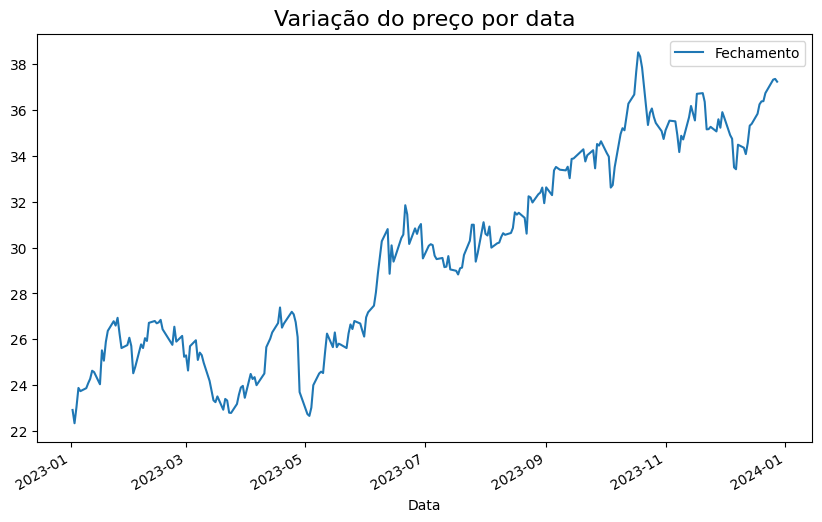

In [ ]:
# Criando o gráfico da variação do preço de fechamento por data, definindo tamanho do gráfico, título e legendas
dados['Fechamento'].plot(figsize=(10,6))
plt.title('Variação do preço por data', fontsize=16)
plt.legend(['Fechamento'])

In [ ]:
# Criando um dataframe com os 60 primeiros dados da base de dados importada (dados)
df = dados.head(60).copy()

In [ ]:
# Convertendo o índice em uma coluna de data
df['Data'] = df.index

In [ ]:
# Convertendo as datas para o formato numérico utilizando a biblioteca mdates, necessário para que o Matplotlib possa plotar as datas corretamente no gráfico
df['Data'] = df['Data'].apply(mdates.date2num)
df.head()

,Abertura,Maximo,Minimo,Fechamento,Fech_Ajust,Volume,Data
Data,,,,,,,
2023-01-02,23.54,23.81,22.80,22.92,17.71,78424700,19359.00
2023-01-03,22.94,23.10,22.13,22.34,17.26,96750300,19360.00
2023-01-04,21.96,23.59,21.83,23.05,17.81,129504000,19361.00
2023-01-05,23.34,24.04,23.15,23.88,18.45,73886000,19362.00
2023-01-06,23.94,24.32,23.55,23.74,18.34,51851500,19363.00


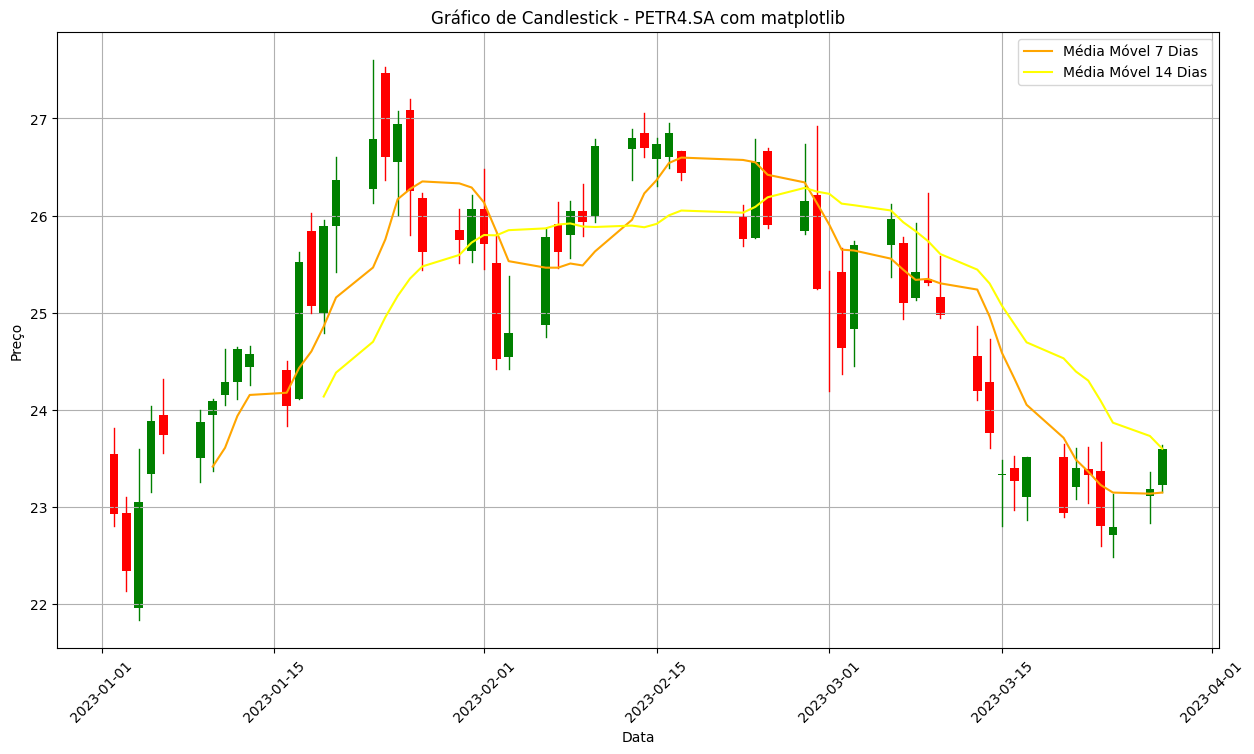

In [ ]:
# Definindo tamanho do gráfico para os elementos que serão exibidos
fig, ax = plt.subplots(figsize=(15, 8))

# Definindo a largura dos candles no gráfico
width = 0.7

# Criando um loop para determinar a cor das barras dos candlesticks (se a ação valorizou ou desvalorizou no dia), e os máximos e mínimos de cada dia
for i in range(len(df)):
    if df['Fechamento'].iloc[i] > df['Abertura'].iloc[i]:
        color = 'green'
    else:
        color = 'red'

    # Definindo a localização para cada linha vertical do candlestick, indicando os valores máximos e mínimos de cada dia
    # [df['Data'].iloc[i], df['Data'].iloc[i]] define o ponto x da linha (a data), e [df['Mínimo'].iloc[i], df['Máximo'].iloc[i]] define a altura da linha.
    ax.plot([df['Data'].iloc[i], df['Data'].iloc[i]],
            [df['Minimo'].iloc[i], df['Maximo'].iloc[i]],
            color=color,
            linewidth=1)

    ax.add_patch(plt.Rectangle((df['Data'].iloc[i] - width/2, min(df['Abertura'].iloc[i], df['Fechamento'].iloc[i])),
                               width,
                               abs(df['Fechamento'].iloc[i] - df['Abertura'].iloc[i]),
                               facecolor=color))

# Criando e inserindo em df as colunas da média móvel para 7 e 14 dias
df['MA7'] = df['Fechamento'].rolling(window=7).mean()
df['MA14'] = df['Fechamento'].rolling(window=14).mean()

# Plotando as médias móveis
ax.plot(df['Data'], df['MA7'], color='orange', label='Média Móvel 7 Dias')  # Média de 7 dias
ax.plot(df['Data'], df['MA14'], color='yellow', label='Média Móvel 14 Dias')  # Média de 14 dias
# Adicionando legendas para as médias móveis
ax.legend()

# Formatando o eixo x para mostrar as datas
# Configuramos o formato da data e a rotação para melhor legibilidade
ax.xaxis_date() #O método xaxis_date() é usado para dizer ao Matplotlib que as datas estão sendo usadas no eixo x
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)

# Adicionando título e rótulos para os eixos x e y
plt.title("Gráfico de Candlestick - PETR4.SA com matplotlib")
plt.xlabel("Data")
plt.ylabel("Preço")

# Adicionando uma grade para facilitar a visualização dos valores
plt.grid(True)

# Exibindo o gráfico
plt.show()

In [ ]:
# Criando subplots com make_subplots, permitindo múltplos gráficos em uma única visualização (neste caso, os gráficos de candlestick e volume transacionado)
fig = make_subplots(rows=2, cols=1, shared_xaxes=True,
                    vertical_spacing=0.1,
                    subplot_titles=('Candlesticks', 'Volume Transacionado'),
                    row_width=[0.2, 0.7])

# Adicionando o subplot de candlestick
fig.add_trace(go.Candlestick(x=df.index,
                             open=df['Abertura'],
                             high=df['Maximo'],
                             low=df['Minimo'],
                             close=df['Fechamento'],
                             name='Candlestick'),
                             row=1, col=1)

# Adicionando as médias móveis ao mesmo subplot para análise de tendências
fig.add_trace(go.Scatter(x=df.index,
                         y=df['MA7'],
                         mode='lines',
                         name='MA7 - Média Móvel 7 Dias'),
                         row=1, col=1)

fig.add_trace(go.Scatter(x=df.index,
                         y=df['MA14'],
                         mode='lines',
                         name='MA14 - Média Móvel 14 Dias'),
                         row=1, col=1)

# Adicionando o gráfico de barras para o volume de transações, fornecendo a intensidade da atividade de negociação naquele dia
fig.add_trace(go.Bar(x=df.index,
                     y=df['Volume'],
                     name='Volume'),
                     row=2, col=1)

# Formatando o layout do gráfico
fig.update_layout(yaxis_title='Preço',
                  xaxis_rangeslider_visible=False,  # Desativa o range slider para não duplicar o subplot dos candlesticks
                  width=1100, height=600)

# Mostrando o gráfico
fig.show()

[*********************100%%**********************]  1 of 1 completed


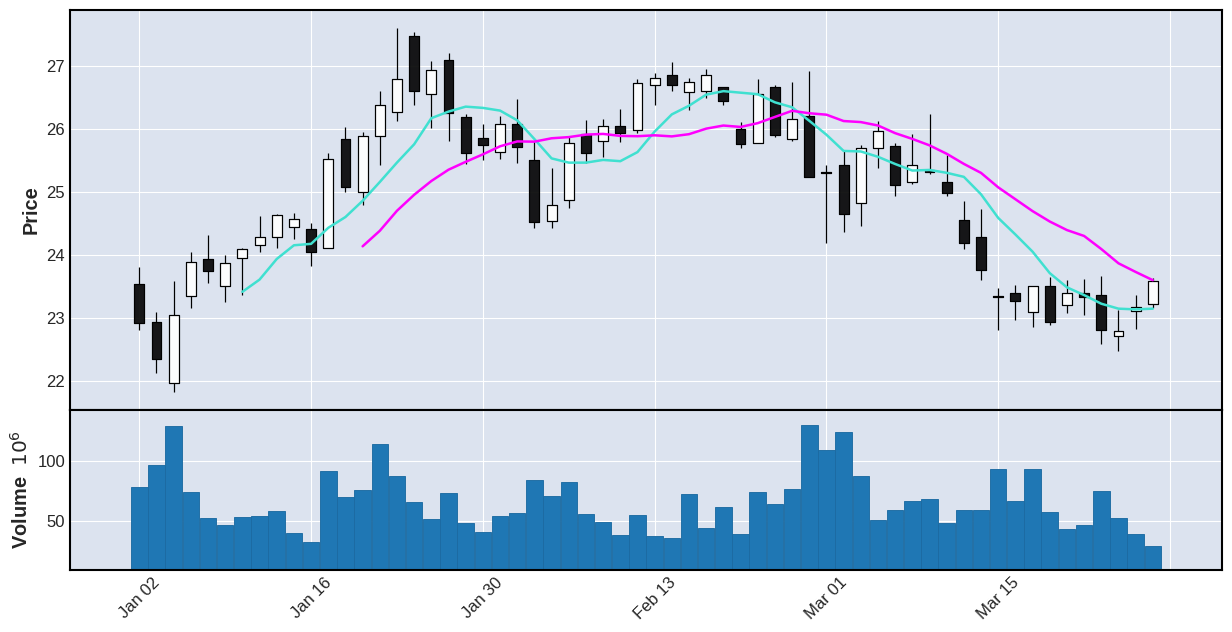

In [ ]:
# Utilizando a biblioteca mplfinance para facilitar a criação do candlestick
dados = yf.download('PETR4.SA', start='2023-01-01', end='2023-12-31')
mpf.plot(dados.head(60), type='candle', figsize = (16,8), volume=True, mav=(7,14))

##Criando predições

In [ ]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Importando a biblioteca prophet como modelo preditivo de machine learning
    # Prophet (criado pelo Facebook) é uma ótima opção para predição quando trabalhamos com poucos dados ou conjuntos de dados pouco regulares
    # As ações possuem comportamento de "random walk", ou seja, possuem variações quase aleatórias.
    # Desta forma, a biblioteca prophet é uma boa escolha de modelo.
from prophet import Prophet

In [ ]:
# Importando os dados dos últimos 4 anos de uma ação específica (neste caso, da empresa Johnson & Johnson)
    # Torna-se interessante importar os dados de alguns anos atrás para verificar a presença de sazonalidades
dados = yf.download("JNJ", start="2020-01-01", end="2023-12-31", progress=False)
dados = dados.reset_index()
dados.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,145.87,146.02,145.08,145.97,130.10,5777000
1,2020-01-03,143.50,145.37,143.00,144.28,128.59,5752400
2,2020-01-06,144.00,144.20,142.85,144.10,128.43,7731300
3,2020-01-07,144.01,145.45,141.38,144.98,129.22,7382900
4,2020-01-08,144.87,145.98,143.70,144.96,129.20,6605800


In [ ]:
# Segregando os dados para treino e para teste
    # Como boas práticas, é interessante alimentar os dados para treino com uma proporção alta dos dados que já possuímos.
    # Neste caso, mais de 80% dos nossos dados serão utilizados para treino.
dados_treino = dados[dados['Date'] < '2023-07-31']
dados_teste = dados[dados['Date'] >= '2023-07-31']

In [ ]:
# Preparando os dados para o Prophet (parametrizando os dados para que o prophet consiga interpretá-los)
dados_prophet_treino = dados_treino[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})
dados_prophet_treino.head()

,ds,y
0,2020-01-02,145.97
1,2020-01-03,144.28
2,2020-01-06,144.10
3,2020-01-07,144.98
4,2020-01-08,144.96


In [ ]:
# Criando o modelo, levando em consideração sazonalidades e feriados (dos EUA)
modelo = Prophet(weekly_seasonality=True,
        yearly_seasonality=True,
        daily_seasonality=False)

modelo.add_country_holidays(country_name='US')

In [ ]:
# Treinando o modelo com os dados de treino
modelo.fit(dados_prophet_treino)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpw808s3fx/ytgjoz03.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw808s3fx/qb0x21ei.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68088', 'data', 'file=/tmp/tmpw808s3fx/ytgjoz03.json', 'init=/tmp/tmpw808s3fx/qb0x21ei.json', 'output', 'file=/tmp/tmpw808s3fx/prophet_modelaua1cnlr/prophet_model-20240401195911.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:59:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:59:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Criando predições para 150 períodos (dias) após a série temporal utilizada para treino
futuro = modelo.make_future_dataframe(periods=150)
previsao = modelo.predict(futuro)
previsao.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Christmas Day,Christmas Day_lower,Christmas Day_upper,Christmas Day (observed),...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-02,146.12,145.10,155.60,146.12,146.12,0.00,0.00,0.00,0.00,...,0.25,0.25,0.25,4.13,4.13,4.13,0.00,0.00,0.00,150.51
1,2020-01-03,146.10,145.50,155.74,146.10,146.10,0.00,0.00,0.00,0.00,...,0.39,0.39,0.39,3.93,3.93,3.93,0.00,0.00,0.00,150.42
2,2020-01-06,146.03,144.26,154.28,146.03,146.03,0.00,0.00,0.00,0.00,...,-0.01,-0.01,-0.01,3.29,3.29,3.29,0.00,0.00,0.00,149.31
3,2020-01-07,146.00,143.81,154.49,146.00,146.00,0.00,0.00,0.00,0.00,...,0.16,0.16,0.16,3.08,3.08,3.08,0.00,0.00,0.00,149.24
4,2020-01-08,145.98,144.02,154.49,145.98,145.98,0.00,0.00,0.00,0.00,...,0.30,0.30,0.30,2.87,2.87,2.87,0.00,0.00,0.00,149.16


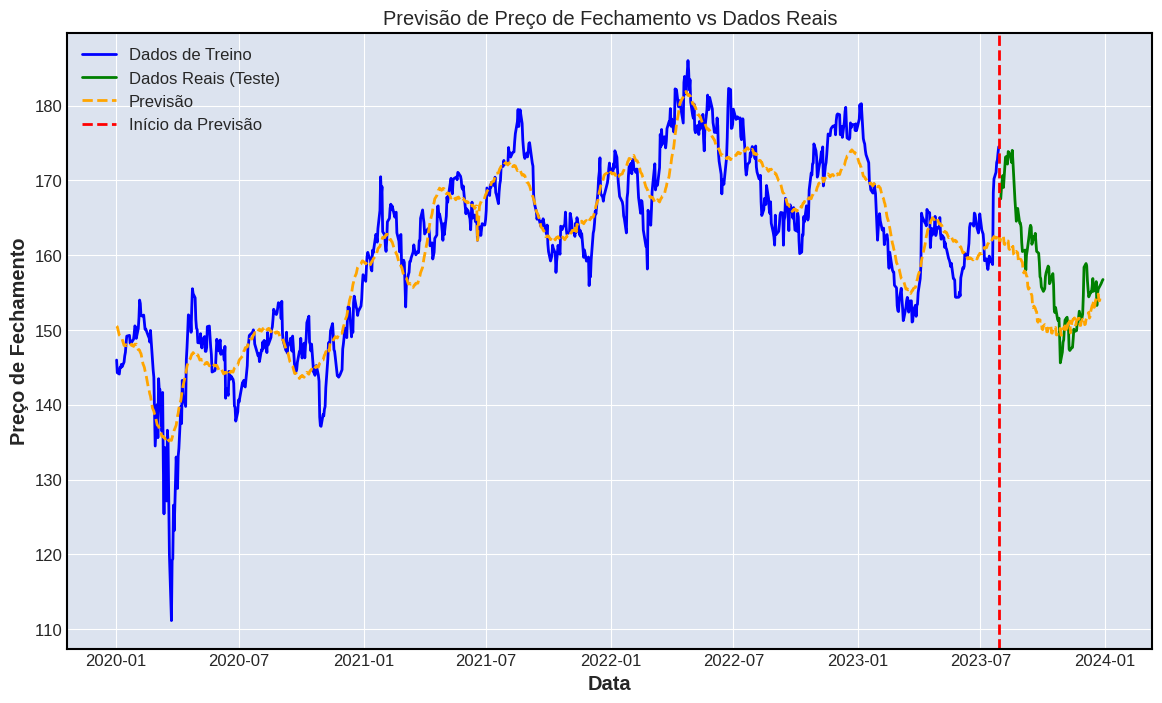

In [ ]:
# Plotando os dados de treino, teste e previsões para comparação com os dados reais
plt.figure(figsize=(14, 8))
plt.plot(dados_treino['Date'], dados_treino['Close'], label='Dados de Treino', color='blue')
plt.plot(dados_teste['Date'], dados_teste['Close'], label='Dados Reais (Teste)', color='green')
plt.plot(previsao['ds'], previsao['yhat'], label='Previsão', color='orange', linestyle='--')

plt.axvline(dados_treino['Date'].max(), color='red', linestyle='--', label='Início da Previsão')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.title('Previsão de Preço de Fechamento vs Dados Reais')
plt.legend()
plt.show()